In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\Sibal_1w46aws\AppData\Local\Temp\ipykernel_20364\930725367.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [9]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [21]:
for column in Measurement.__table__.columns:
    print(column)

measurement.id
measurement.station
measurement.date
measurement.prcp
measurement.tobs


# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
start_date_str = session.query(func.max(Measurement.date)).scalar()
start_date_str

'2017-08-23'

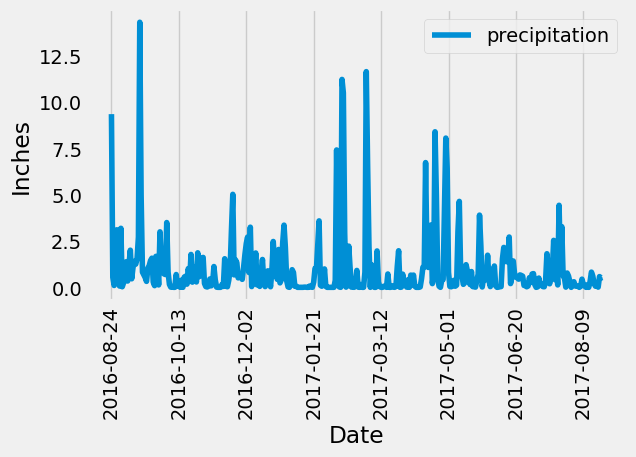

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
start_date = dt.datetime.strptime(start_date_str, "%Y-%m-%d")
# print(start_date)
# Calculate the date one year from the last date in data set.
end_date = start_date - dt.timedelta(days=365)
# print(end_date)
# Perform a query to retrieve the data and precipitation scores
precipitations = session.query(
    Measurement.date,
    func.sum(Measurement.prcp).label('precipitation')
).filter(
    sqlalchemy.and_(
        Measurement.date <= start_date,
        Measurement.date >= end_date
    )
).group_by(Measurement.date).order_by(Measurement.date).all()
# print(precipitations)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitations, columns=['date', 'precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.set_index('date')['precipitation']\
    .plot()
# plt.title('Total Precipitation from {} to {}'.format(start_date.date(), end_date.date()))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_df = pd.DataFrame(precipitation_df["precipitation"].describe()).reset_index(names="")
summary_df

,,precipitation
0,count,365.000000
1,mean,0.974164
2,std,1.776466
3,min,0.000000
4,25%,0.050000
5,50%,0.400000
6,75%,1.080000
7,max,14.280000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

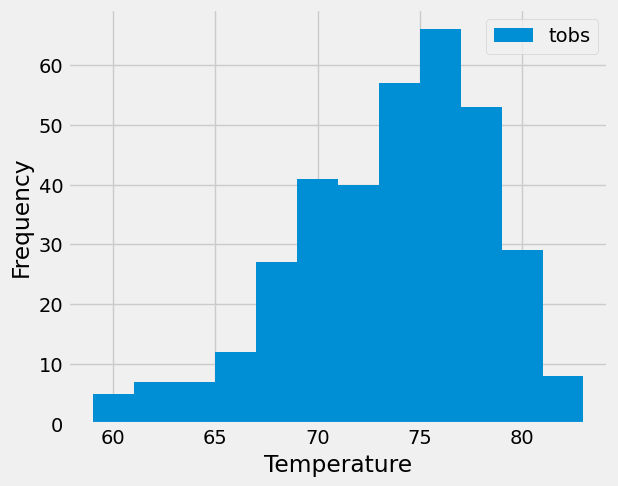

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()